author ~ Adithia jovandy

### Import Library

In [1]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import sklearn

Using TensorFlow backend.


### Load Dataset

In [2]:
dataset = pd.read_csv("C:/Users/Adithia Jo/Documents/Anaconda/Machine learning/ANN/09011181722012_Adithia_jovandy/breast_cancer_dataset.csv")

In [3]:
dataset

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
564,4,1,1,1,2,1,3,2,1,0
565,5,7,10,10,5,10,10,10,1,1
566,3,1,2,1,2,1,3,1,1,0
567,4,1,1,1,2,3,2,1,1,0


# Set data dan Target
Set data untuk feature yaitu kolom 1-9, dan kolom 10 sebagai target

In [4]:
data_raw = dataset.iloc[:,0:9].values
target = dataset.iloc[:,9].values

# Data Preprocessing
### Scaling
Karena dilihat pada persebaran data, agar data tidak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0 (minmax scalling)

In [5]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data_raw)

#Buat Variabel data_dataframe hanya untuk menampilkan, selanjutnya variabel data akan tetap dalam bentuk numpy array
data_dataframe = pd.DataFrame(data)
data_dataframe.head()

,0,1,2,3,4,5,6,7,8
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.99991,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.00000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.99992,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.99994,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.99991,0.222222,0.000000,0.0


### Splitting
Membagi data secara acak, dengan persentase 80% untuk data latih, 20% untuk data testing. Raandom state digunakan agar data yang sudah baik, tidak diacak lagi saat spliting, agar persebaran data tidak berubah, yang bisa mempengaruhi learning dari model.

In [6]:
data_training, data_testing, target_training, target_testing = train_test_split(data_raw, target, test_size=0.2, random_state=42)

# ANN
### MODEL
Menggunakan 1 input layer dengan 9 neuron, 1 hidden layer dengan 30 neuron (fungsi aktivasi relu), dan 1 output layer dengan 1 neuron (fungsi aktivasi sigmoid).

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile Data
Menggunakan loss Mean Square Error, dan metric Akurasi sebagai parameternya

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# FIT
Proses training model. Disini akan dilakukan training model, dimana JST akan melakukan learning berdasarkan data latih yaitu **data_training** (feature) dan **target_training** (target). Disini juga dilakukan validasi dengan data uji, ditampung pada variabel **data_testing** (feature) dan **target_testing** (target). Guna dilakukan FIT adalah agar setiap epochnya dapat ditampung dalam variabel **history_validasi**, sehingga bisa diplot perubahannya.

In [9]:
history_validasi = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=100)


Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 0s 435us/step - loss: 0.2574 - accuracy: 0.7011 - val_loss: 0.1946 - val_accuracy: 0.7632
Epoch 2/100
455/455 [==============================] - 0s 57us/step - loss: 0.2002 - accuracy: 0.7407 - val_loss: 0.1796 - val_accuracy: 0.7895
Epoch 3/100
455/455 [==============================] - 0s 62us/step - loss: 0.1754 - accuracy: 0.7934 - val_loss: 0.1526 - val_accuracy: 0.8596
Epoch 4/100
455/455 [==============================] - 0s 75us/step - loss: 0.1554 - accuracy: 0.8440 - val_loss: 0.1370 - val_accuracy: 0.8596
Epoch 5/100
455/455 [==============================] - 0s 62us/step - loss: 0.1399 - accuracy: 0.8681 - val_loss: 0.1240 - val_accuracy: 0.8596
Epoch 6/100
455/455 [==============================] - 0s 66us/step - loss: 0.1267 - accuracy: 0.8835 - val_loss: 0.1146 - val_accuracy: 0.8596
Epoch 7/100
455/455 [==============================] - 0s 62us/step - loss: 0.1182 - acc

### Perhitungan Akurasi
Evaluasi dengan mencari skor data testing atau akurasi data testing. Nilai evaluasi disimpan pada variabel **scores**.

In [10]:
scores = model.evaluate(data_testing, target_testing)
print("Akurasi data Testing = %.2f%%" % (scores[1]*100))

114/114 [==============================] - 0s 53us/step
Akurasi data Testing = 97.37%


## Validasi Model

### Plot akurasi model
Evaluasi akurasi model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

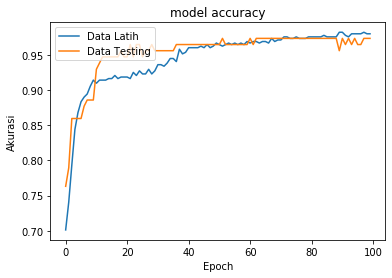

In [12]:
plt.plot(history_validasi.history['accuracy'])
plt.plot(history_validasi.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Plot Loss
Evaluasi loss/error model, dibuat plot yang menunjukan perbandingan dari hasil learning pada data uji dan data latih

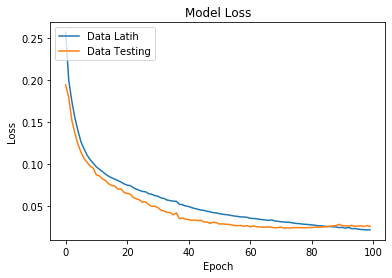

In [13]:
plt.plot(history_validasi.history['loss'])
plt.plot(history_validasi.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data Latih', 'Data Testing'], loc='upper left')
plt.show()

### Confussion Matrix

Selanjutnya untuk mengevaluasi hasil prediksi, akan dibuat confussion matriks. Fungsinya untuk melihat hasil prediksi, yang akan digolongkan menjadi beberapa kategori. Karena klasifikasinya adalah binary (1 dan 0) maka ada 4 kemungkinan prediksi yaitu True Positive, False Positive, False Negative, True Negative. Berikut ditampilkan hasil dari setiap klasifikasinya. Pertama adalah menampun isi dari prediksi pada variabel prediction

In [14]:
prediction = model.predict_classes(data_testing)

In [15]:
from sklearn.metrics import confusion_matrix
prediction = model.predict_classes(data_testing)
cm = confusion_matrix(target_testing, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print ("Confussion matriks:\n",cm)
print ("Jumlah True Positive: ", tp)
print ("Jumlah True Negative: ", tn)
print ("Jumlah False Positive: ", fp)
print ("Jumlah False Negative: ", fn)

Confussion matriks:
 [[82  2]
 [ 1 29]]
Jumlah True Positive:  82
Jumlah True Negative:  29
Jumlah False Positive:  2
Jumlah False Negative:  1


## mencari nilai evaluasi 

In [16]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
spec = tn / (tn+fp)
Sensitivity = tp/(tp + fn)

#menampilkan
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("spec : ",spec)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9761904761904762
recall :  0.9879518072289156
F1 :  0.9820359281437125
spec :  0.9354838709677419
sensitivity :  0.9879518072289156
akurasi :  0.9736842105263158


## Visualisasi ROC
ROC digunakan untuk melihat perbadingan antara Sensitivitas dan Spesifisitas. Dalam kurva ROC, tingkat positif yang sesungguhnya (Sensitivitas) diplot dalam fungsi tingkat positif palsu (100-Spesifitas) untuk titik potong yang berbeda dari suatu parameter. Setiap titik pada kurva ROC mewakili pasangan sensitivitas / spesifisitas yang sesuai dengan ambang keputusan tertentu. Area di bawah kurva ROC (AUC) adalah ukuran seberapa baik parameter dapat membedakan antara dua kelompok diagnostik (berpenyakit / normal).

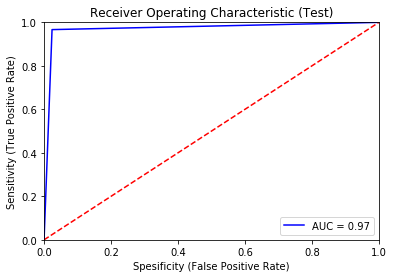

In [21]:
fpr, tpr, threshold = sklearn.metrics.roc_curve(target_testing, prediction)
roc_auc = sklearn.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (Test)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Sensitivity (True Positive Rate)')
plt.xlabel('Spesificity (False Positive Rate)')
plt.show()